In [120]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re

In [121]:
#genre_dict line is to map the document with genre ID numbers but not numbers.
genre_dict = {"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}
df_ratings=pd.read_csv('imdb.title.ratings.csv.gz')
df_basics=pd.read_csv('imdb.title.basics.csv.gz')
df_gross=pd.read_csv('bom.movie_gross.csv.gz')
df_name_basics=pd.read_csv('imdb.name.basics.csv.gz')
df_title_crew=pd.read_csv('imdb.name.basics.csv.gz')
df_title_akas=pd.read_csv('imdb.title.akas.csv.gz')

In [127]:
df_ratings.head()
df_ratings.sort_values(by='numvotes',ascending=False)
#Would like to get movie titles, genres, and studios in this table to make more useful conclusions.

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


In [128]:
#df_ratings_and_basics = pd.concat([df_ratings, df_basics], axis=1, join='inner')???

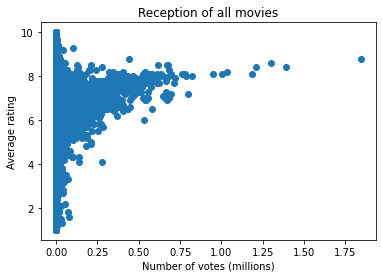

Correlation between ratings and other variables: 


numvotes         0.044478
averagerating    1.000000
Name: averagerating, dtype: float64

In [129]:
fig, ax=plt.subplots()
popularity_subplot=ax.scatter(df_ratings['numvotes']/1e6,df_ratings['averagerating'])
ax.set_xlabel('Number of votes (millions)')
ax.set_ylabel('Average rating')
ax.set_title('Reception of all movies')
plt.show()

df_ratings.describe()

#Show correlations (nothing very useful from this table, but this is often helpful)
print('Correlation between ratings and other variables: ')
df_ratings.corr()['averagerating'].sort_values()

In [130]:
#df_ratings_basics.concat ???
#Would also like to get ratings and gross into the table right above this one.

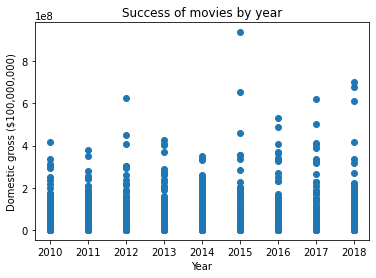

Correlation between domestic gross and other variables: 


year              0.018708
domestic_gross    1.000000
Name: domestic_gross, dtype: float64

In [136]:
df_gross.head()
df_gross.sort_values(by='domestic_gross',ascending=False)
df_gross.describe()

fig, ax=plt.subplots()
popularity_subplot=ax.scatter(df_gross['year'],df_gross['domestic_gross'])
ax.set_xlabel('Year')
ax.set_ylabel('Domestic gross ($100,000,000)')
ax.set_title('Success of movies by year')
plt.show()

df_gross.describe()

#Show correlations (nothing very useful from this table, but this is often helpful)
print('Correlation between domestic gross and other variables: ')
df_gross.corr()['domestic_gross'].sort_values()

In [117]:
#df_name_basics.head()
#Analyze this table later on if necessary. Focus on main questions first.

In [118]:
#df_title_akas.head()
#Analyze this table later on if necessary. Focus on main questions first.

In [ ]:
#Documentaries, sports movies? (And which ones would be considered sports movies?)
#Diversity/inclusion
#Critic, customer reviews (Assuming Microsoft is more interested in critic reviews b/c more potentialpositive publicity there)
#Top writers, studios (recruiting)
#Most popular (stars), highest grossing ($)
#(Determine which studios are which)